In [101]:
import cv2
import torchvision
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as F

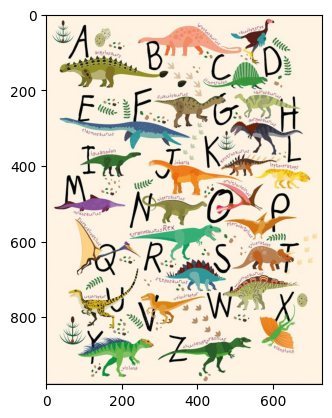

In [102]:
main = cv2.imread("abc.jpg")
main = cv2.cvtColor(main, cv2.COLOR_BGR2RGB)
plt.imshow(main)
plt.show()

In [105]:
#4ый слой - соответствует последнему блоку перед глобальным усреднением и полносвязными слоями в ResNet-50
layer4_features = None
def get_features(module, inputs, output):
    global layer4_features
    layer4_features = output

im_pil = Image.fromarray(main)
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

img_preprocessed = preprocess(im_pil)

batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)

model = torchvision.models.resnet50(pretrained=True)
model.layer4.register_forward_hook(get_features)

result = model(batch_img_tensor)


In [107]:
arr =  []
arr.append(layer4_features)

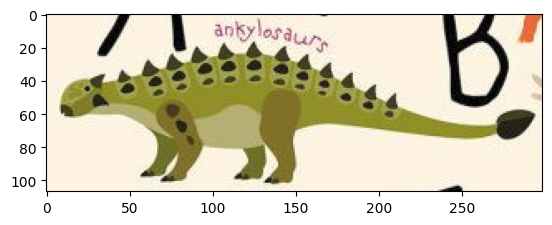

In [108]:
dino_1 = cv2.imread("A.png")
dino_1 = cv2.cvtColor(dino_1, cv2.COLOR_BGR2RGB)
plt.imshow(dino_1)
plt.show()

In [109]:
layer4_features = None
def get_features(module, inputs, output, layer4_features):
    layer4_features = output

im_pil = Image.fromarray(dino_1)
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
        ])

img_preprocessed = preprocess(im_pil)

batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)

model = torchvision.models.resnet50(pretrained=True)
model.layer4.register_forward_hook(get_features)



result = model(batch_img_tensor)

In [118]:
arr.append(layer4_features)
arr[0] = F.functional.normalize(arr[0])
arr[1] =  F.functional.normalize(arr[1])
arr[1][0].shape
test = F.functional.conv2d(arr[0],arr[1])

test_norm = (test/40)*255


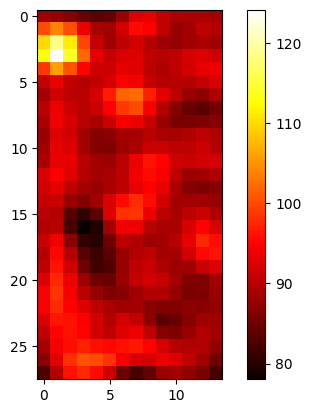

In [121]:
res = test_norm[0][0].cpu().detach().numpy()
plt.imshow(res, cmap='hot',)
plt.colorbar()
plt.show()

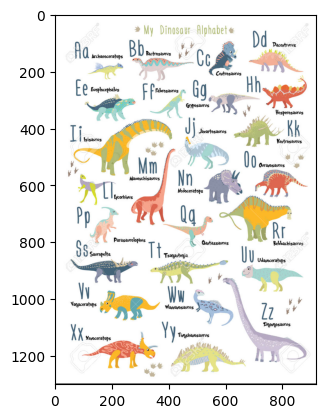

In [122]:
main2 = cv2.imread("abc1.jpg")
main2 = cv2.cvtColor(main2, cv2.COLOR_BGR2RGB)
plt.imshow(main2)
plt.show()

In [123]:
layer4_features = None
def get_features(module, inputs, output, layer4_features):
    layer4_features = output

im_pil = Image.fromarray(main2)
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
        ])

img_preprocessed = preprocess(im_pil)

batch_img_tensor = torch.unsqueeze(img_preprocessed, 0)

model = torchvision.models.resnet50(pretrained=True)
model.layer4.register_forward_hook(get_features)



result = model(batch_img_tensor)

In [126]:
l = F.functional.normalize(layer4_features)
test = F.functional.conv2d(l,arr[1])
test_norm = (test)

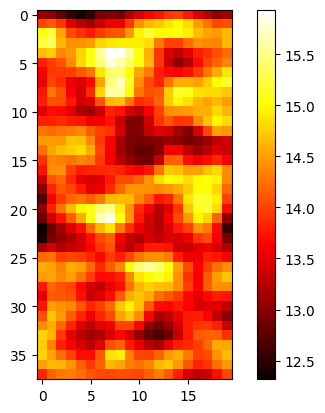

In [127]:
res = test_norm[0][0].cpu().detach().numpy()
plt.imshow(res,cmap='hot',)
plt.colorbar()
plt.show()